In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import time


import matplotlib.pyplot as plt
import numpy as np


import random
from random import sample

import gym
import gym_omnipath

def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

### Controllable Environment

```
try:
    env = gym.make('omnipath-v0')
    env.controllable()
    while True:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        env.render()
except KeyboardInterrupt:
        env.close()
        print('Environment Closed')
```

In [2]:
try:
    env = gym.make('omnipath-v0')
    for i in range(env.board.screen_size-1,-1,-1):
        for j in range(env.board.screen_size):
            env.agent.set_state(np.array([j,i]))
            env.update_values(env.agent.state)
    print('Environment Mapped')
except KeyboardInterrupt:
    env.close()
    print('Environment Closed')

Environment Mapped


In [3]:
import random
try:
    env = gym.make('omnipath-v0')
    for i in range(100000):
        choice = random.uniform(0, 1)
        if choice > 0.1:
            best = 0
            best_choice = None
            for state in env.board.available_locations(env.agent.state):
                x,y = state
                state_reward = env.values[y][x][0]
                if state_reward >= best:
                    best = state_reward
                    best_choice = state
                action = env.agent.new_state_action(best_choice)
            state, reward, done, info = env.step(action)
            env.update_values(env.agent.state)
        else:
            states = env.board.available_locations(env.agent.state)
            index = random.randint(0,len(states)-1)
            random_choice = states[index]
            action = env.agent.new_state_action(random_choice)
            state, reward, done, info = env.step(action)
            if done:
                break
            env.update_values(env.agent.state)
            
    print('Environment Mapped')
except KeyboardInterrupt:
    env.close()
    print('Environment Closed')

Environment Mapped


(27.0, 3.0)


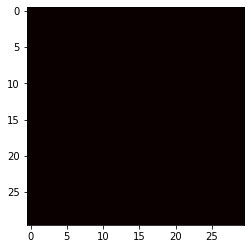

In [4]:
%matplotlib inline

print(env.board.goal)
plt.imshow(env.values[:,:,0], cmap='hot')
plt.show()

In [24]:
temp_goal = env.board.goal
temp_values = env.values

In [25]:
env = gym.make('omnipath-v0')
env.board.set_goal(temp_goal)
env.values = temp_values
env.agent.reset()
env.done = False
done = False
try:
    while not done:

        decision = random.uniform(0, 1)

        if decision < 0:
            action = env.action_space.sample()
        else:
            best = 0
            best_choice = None
            
            for state in env.board.available_locations(env.agent.state):
                x,y = state
                state_reward = env.values[y][x][0]
                #reward = env.board.state_reward(state)
                if state_reward >= best:
                    best = state_reward
                    best_choice = state
            action = env.agent.new_state_action(best_choice)
            
        state, reward, done, info = env.step(action)
        
        time.sleep(0.1)
        env.render()

    env.close()
    print("Goal Reached")
except KeyboardInterrupt:
        env.close()
        print('Environment Closed')

SystemExit: 0